## Lecture Breaks (Pokemon k-NN)

In [1]:
# read in Pokemon data again
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(font_scale=1.2)

def make_lower(x):
    return str(x).lower()

df_poke = pd.read_csv('pokedata.csv')
df_poke = df_poke.rename(make_lower, axis = 1)
df_poke = df_poke.set_index('pokedex')
df_poke.head()

,pokemon,maintype,secondarytype,height,weight,damage,basespeed,attack,defense
pokedex,,,,,,,,,
1,Bulbasaur,Grass,Poison,24,25.2,45,45,49,49
2,Ivysaur,Grass,Poison,39,28.7,60,60,62,63
3,Venusaur,Grass,Poison,79,220.5,80,80,82,83
4,Charmander,Fire,NaN,24,18.7,39,65,52,43
5,Charmeleon,Fire,NaN,43,41.9,58,80,64,58


In [2]:
bool_3types = (df_poke['maintype'] == 'Grass') | (df_poke['maintype'] ==  'Fire') | (df_poke['maintype'] ==  'Water')

In [3]:
df_3types = df_poke.loc[bool_3types,:]
# df_3types

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

k = 3
x_feat_list = ['height', 'weight', 'damage']
y_feat = 'maintype'

# scale normalization (overwrites old data)
for feat in x_feat_list:
    df_3types[feat] = df_3types[feat] / df_3types[feat].std()

# extract data into numpy format (for sklearn)
x = df_3types.loc[:, x_feat_list].values
y_true = df_3types.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
knn_classifier.fit(x, y_true)

# estimate each penguin's species
y_pred = knn_classifier.predict(x)

C:\Users\eager\AppData\Local\Temp\ipykernel_17244\3275975928.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3types[feat] = df_3types[feat] / df_3types[feat].std()


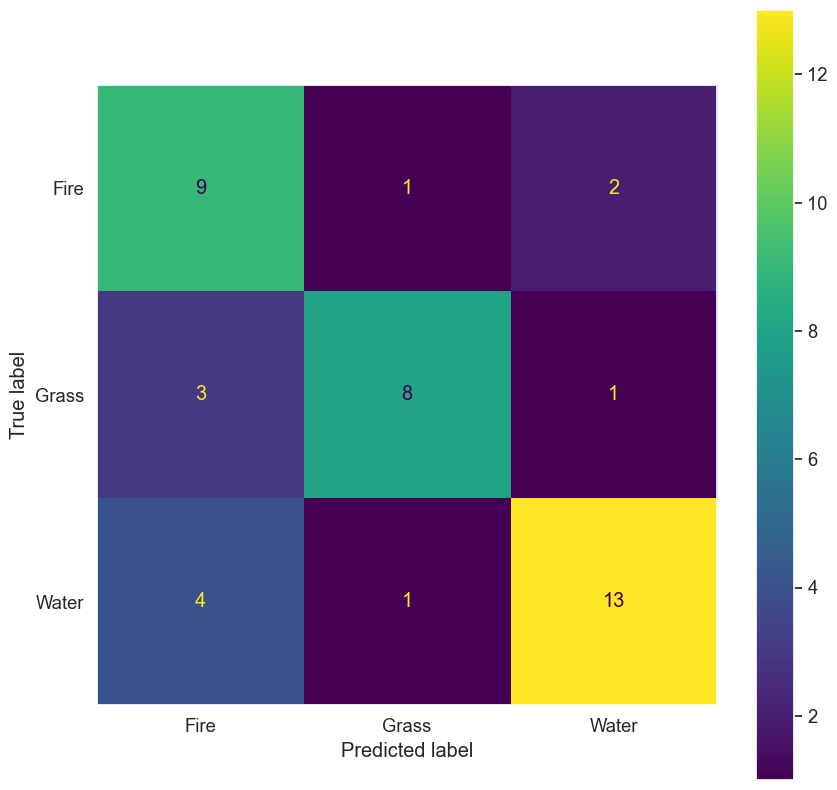

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)

conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
conf_mat_disp.plot()

plt.gcf().set_size_inches(10, 10)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)

In [6]:
# Initiate position of correct prediction (goes diagonal down the rows)
correct_pred_pos = 0

# Identify pokemon type
type_names = np.unique(y_true)

for row in conf_mat:
    # Sum total number of maintype
    total_pokemon = sum(row)
    
    # Extract correct predictions
    correct_pred = row[correct_pred_pos]
    
    # Compute accuracy
    accuracy = correct_pred / total_pokemon
    
    # Find the other maintype it is most commonly mistaken for
    secondmax_pred = sorted(row)[-2]
    secondmax_pos = np.where(row == secondmax_pred)
    
    print(f'{type_names[correct_pred_pos]} maintype accuracy: {accuracy:.3f}')
    print(f'\tMaintype most commonly mistaken for: {type_names[secondmax_pos][0]}\n')
    
    
    correct_pred_pos += 1

Fire maintype accuracy: 0.750
	Maintype most commonly mistaken for: Water

Grass maintype accuracy: 0.667
	Maintype most commonly mistaken for: Fire

Water maintype accuracy: 0.722
	Maintype most commonly mistaken for: Fire



## Then with cross validation

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

k = 3
x_feat_list = ['height', 'weight', 'damage']
y_feat = 'maintype'

# scale normalization (overwrites old data)
for feat in x_feat_list:
    df_3types[feat] = df_3types[feat] / df_3types[feat].std()

# extract data into numpy format (for sklearn)
x2 = df_3types.loc[:, x_feat_list].values
y_true2 = df_3types.loc[:, y_feat].values

# initialize a knn_classifier
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# construction of kfold object
kfold = StratifiedKFold(n_splits=4)

# allocate an empty array to store predictions in
y_pred2 = copy(y_true2)

for train_idx, test_idx in kfold.split(x2, y_true2):
    # build arrays which correspond to x, y train /test
    x_test2 = x2[test_idx, :]
    x_train2 = x2[train_idx, :]
    y_true_train2 = y_true2[train_idx]
    
    print(Counter(y_true_train2))
    
    # fit happens "inplace", we modify the internal state of knn_classifier to remember all the training samples
    knn_classifier.fit(x_train2, y_true_train2)

    # estimate each pokemon's maintype
    y_pred2[test_idx] = knn_classifier.predict(x_test2)

C:\Users\eager\AppData\Local\Temp\ipykernel_17244\3007623061.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3types[feat] = df_3types[feat] / df_3types[feat].std()


NameError: name 'StratifiedKFold' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_mat2 = confusion_matrix(y_true=y_true2, y_pred=y_pred2)

conf_mat_disp2 = ConfusionMatrixDisplay(conf_mat2, display_labels=np.unique(y_true2))
conf_mat_disp2.plot()

plt.gcf().set_size_inches(10, 10)

# seaborn turns on grid by default ... looks best without it
plt.grid(False)